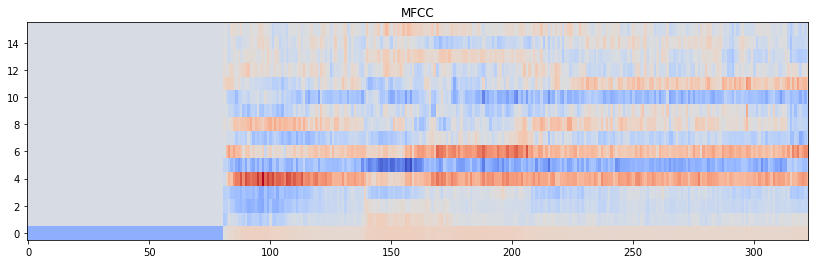

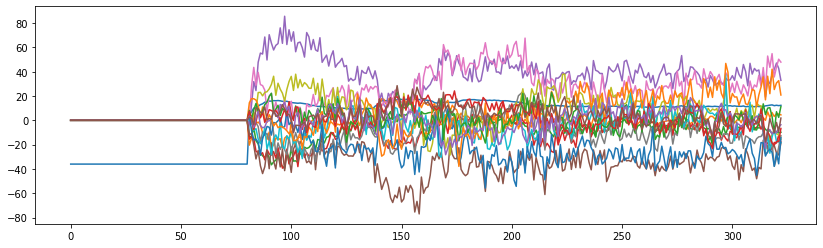

In [8]:
!pip install scipy
import scipy
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
plt.rcParams["figure.figsize"] = [14,4]

(rate,sig) = wav.read("yes.wav")
mfcc_feat_yes = mfcc(sig,rate,numcep=16)

ig, ax = plt.subplots()
mfcc_data_yes= np.swapaxes(mfcc_feat_yes, 0 ,1)
cax = ax.imshow(mfcc_data_yes, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat_yes)
plt.show()



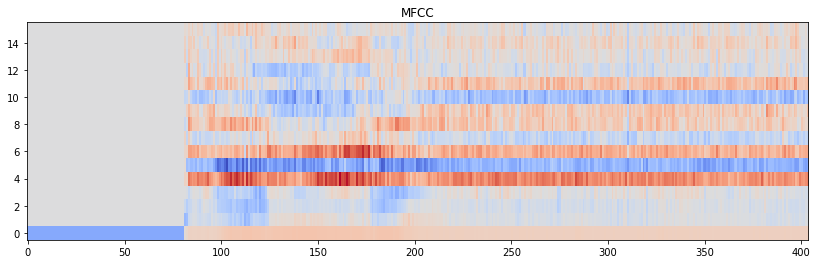

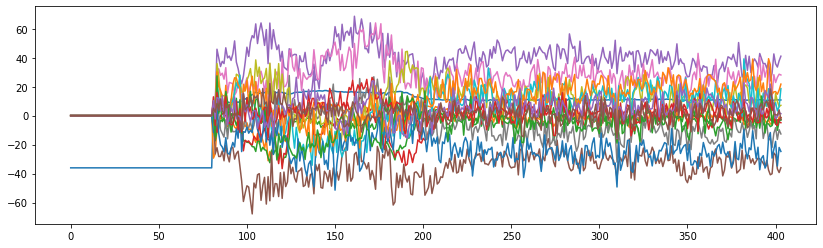

In [10]:
!pip install scipy
import scipy
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
plt.rcParams["figure.figsize"] = [14,4]

(rate,sig) = wav.read("no.wav")
mfcc_feat_no = mfcc(sig,rate,numcep=16)

ig, ax = plt.subplots()
mfcc_data_no= np.swapaxes(mfcc_feat_no, 0 ,1)
cax = ax.imshow(mfcc_data_no, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat_no)
plt.show()

In [12]:
### Dynamic Time Warping with Cepstral Distance
!pip install scipy
import scipy
from scipy.spatial.distance import cdist
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
plt.rcParams["figure.figsize"] = [14,4]

def dtw (x, y):
    cost_matrix = scipy.spatial.distance.cdist(x, y,metric='seuclidean')
    m,n = np.shape(cost_matrix)
    for i in range(m):
        for j in range(n):
            if ((i==0) & (j==0)):
                cost_matrix[i,j] = cost_matrix[i,j]

            elif (i==0):
                cost_matrix[i,j] = cost_matrix[i,j] + cost_matrix[i,j-1]

            elif (j==0):
                cost_matrix[i,j] = cost_matrix[i,j] + cost_matrix[i-1,j]

            else:
                min_local_dist = cost_matrix[i-1,j]

                if min_local_dist > cost_matrix[i,j-1]:
                    min_local_dist = cost_matrix[i,j-1]

                if min_local_dist > cost_matrix[i-1,j-1]:
                    min_local_dist = cost_matrix[i-1,j-1]

                cost_matrix[i,j] = cost_matrix[i,j] + min_local_dist
    return cost_matrix[m-1,n-1]

#### test input
(rate,sig) = wav.read("yes2.wav")
mfcc_feat_test = mfcc(sig,rate,numcep=16)


distance_1 = dtw(mfcc_feat_test.reshape(-1,1),mfcc_feat_yes.reshape(-1,1))
print('the similarity between the test and yes vector : %.2f' % distance_1)
distance_2 = dtw(mfcc_feat_test.reshape(-1,1),mfcc_feat_no.reshape(-1,1))
print('the similarity between the  test and no vector : %.2f' % distance_2)

if distance_2 > distance_1:
  print('The input word is No') 
else:
    print('The input word is Yes')


the similarity between the test and yes vector : 3442.61
the similarity between the  test and no vector : 3004.18
The input word is Yes
